In [1]:
import pandas as pd
import numpy as np

In [2]:
# import the mutualfund dataset
mutual_fund_data = pd.read_csv('Top100MutualFunds.csv')
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [3]:
# select 'Category3' column and count the number of time each value appears in the column
mutual_fund_data['Category3'].value_counts()

Large cap                 88
Mid cap                    9
Health care                1
Communication Services     1
Small cap                  1
Name: Category3, dtype: int64

In [4]:
#group the data in the "mutual_fund_data" by the values in the "Category3" column,
# and then calculate the mean of the numerical columns for each group.
mutual_fund_data.groupby('Category3').mean()

C:\Users\akoto\AppData\Local\Temp\ipykernel_2420\3026023706.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mutual_fund_data.groupby('Category3').mean()


,Morningstar Rating
Category3,
Communication Services,5.000000
Health care,5.000000
Large cap,3.658824
Mid cap,4.000000
Small cap,4.000000


In [5]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime

# Create an empty dictionary to store mutual fund data
mutual_fund_dict = {}

# Extract a list of symbols from the 'Symbol' column of the mutual_fund_data DataFrame
symbols = list(mutual_fund_data['Symbol'])

# Define the start and end dates for the time period of interest
start = datetime(1980, 1, 1)
end = datetime(2020, 1, 1)

# Print the start and end dates, as well as the list of symbols
print(start, end, symbols)


1980-01-01 00:00:00 2020-01-01 00:00:00 ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX']


In [6]:
# Override pandas datareader to use Yahoo Finance as the data source
yf.pdr_override()

# Use the get_data_yahoo function from pandas datareader to retrieve mutual fund data 
# from Yahoo Finance for the specified symbols and time period
fund_data = web.get_data_yahoo(symbols, start, end)


[*********************100%***********************]  100 of 100 completed


In [7]:
# Extract the 'Adj Close' column from the fund_data DataFrame and store it in a new variable called close_data
close_data = fund_data['Adj Close']
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.725494,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721446,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.732577,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735612,...,0.580032,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753825,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.298405,43.498634,34.078854,41.269047,41.468193,28.316504,28.111414,38.422379,38.686337,51.326996,...,42.597168,80.298607,43.188068,32.569069,106.341019,29.883804,43.968906,14.698989,29.131344,36.265896
2019-12-26,38.386574,43.719612,34.225334,41.387012,41.586231,28.408520,28.203419,38.510830,38.775356,51.558983,...,42.654213,80.374329,43.536549,32.785183,107.248016,30.146883,44.383232,14.812883,29.243479,36.535660
2019-12-27,38.413017,43.711117,34.225334,41.441452,41.640713,28.400158,28.186691,38.537365,38.802055,51.608692,...,42.504471,80.290184,43.512787,32.761173,107.316467,30.130440,44.357864,14.819583,29.243479,36.501934


In [8]:
# Use the get_data_yahoo function from Pandas datareader to retrieve the 'Adj Close' values 
# for the S&P 500 index from Yahoo Finance for the specified time period, 
# and store the resulting data in a new column of the close_data DataFrame called 'S&P 500'
close_data['S&P 500'] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\akoto\AppData\Local\Temp\ipykernel_2420\2460838394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data['S&P 500'] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']


In [9]:
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.725494,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721446,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.732577,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735612,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753825,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.298405,43.498634,34.078854,41.269047,41.468193,28.316504,28.111414,38.422379,38.686337,51.326996,...,80.298607,43.188068,32.569069,106.341019,29.883804,43.968906,14.698989,29.131344,36.265896,3223.379883
2019-12-26,38.386574,43.719612,34.225334,41.387012,41.586231,28.408520,28.203419,38.510830,38.775356,51.558983,...,80.374329,43.536549,32.785183,107.248016,30.146883,44.383232,14.812883,29.243479,36.535660,3239.909912
2019-12-27,38.413017,43.711117,34.225334,41.441452,41.640713,28.400158,28.186691,38.537365,38.802055,51.608692,...,80.290184,43.512787,32.761173,107.316467,30.130440,44.357864,14.819583,29.243479,36.501934,3240.020020


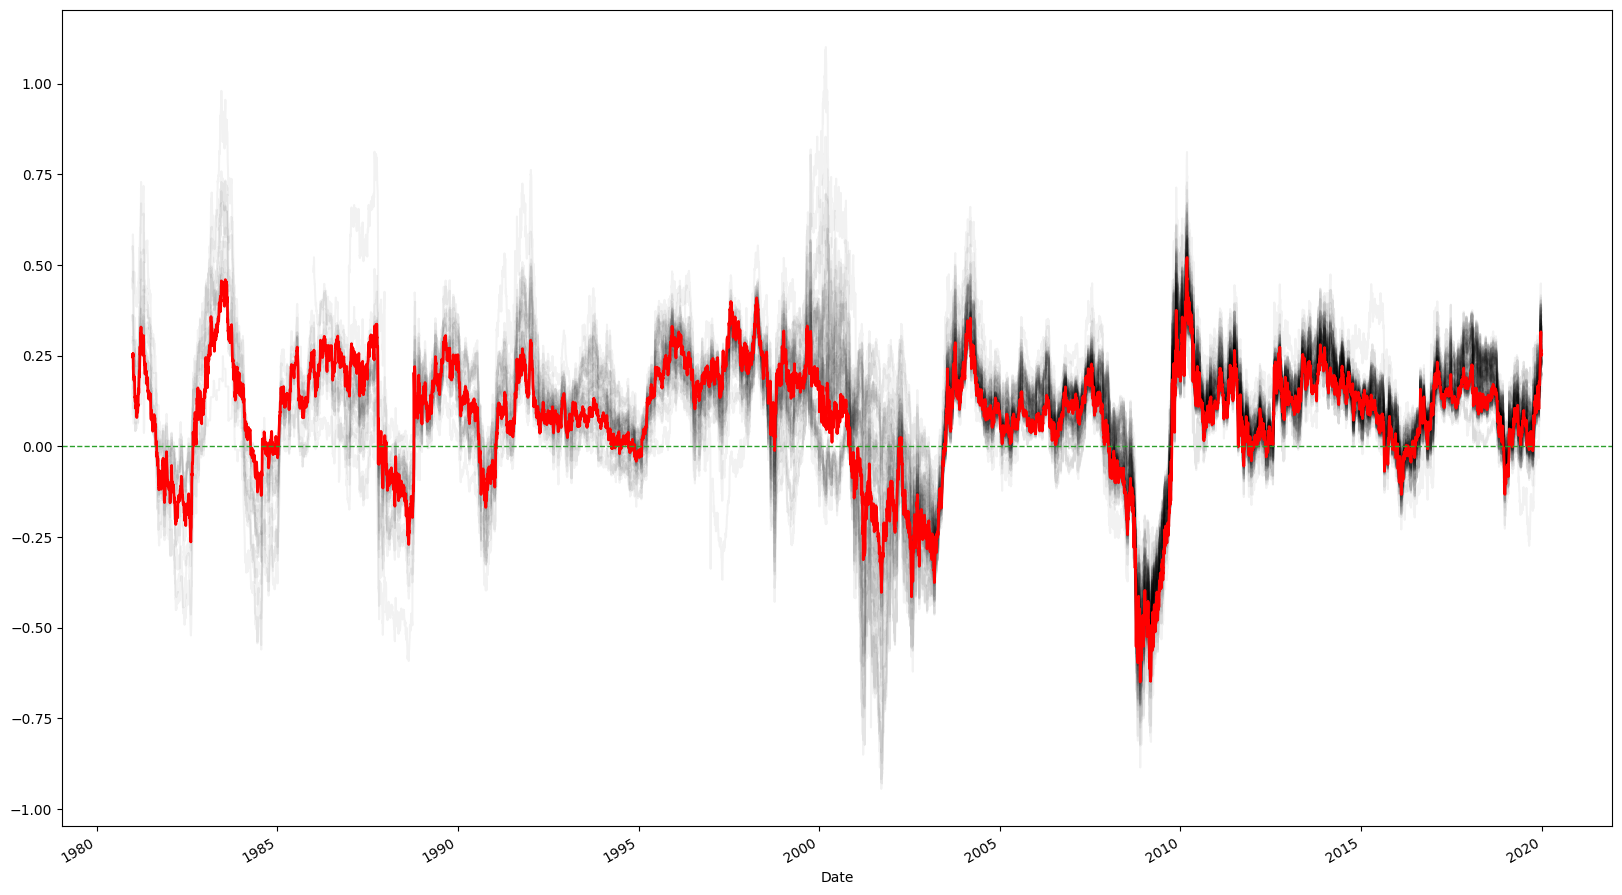

In [10]:
import matplotlib.pyplot as plt

# Calculate the year-over-year returns using the log differences of the close_data DataFrame 
# over a period of 251 trading days (i.e., one year)
yoy_return = np.log(close_data).diff(251)

# Create a new figure with a specified size, and plot the year-over-year returns 
# for each mutual fund in the close_data DataFrame using a line plot with a low alpha value
fig, ax = plt.subplots(figsize=(20, 12))
yoy_return.plot.line(legend=False, color='k', alpha=.05, ax=ax)

# Overlay the year-over-year returns for the S&P 500 index as a separate line plot with a different color and linewidth
yoy_return['S&P 500'].plot.line(color='Red', linewidth=2, ax=ax)

# Add a horizontal line at y = 0 to represent zero percent returns, with a dashed line style and a specified color and linewidth
ax.axhline(0, ls='--', color='C2', linewidth=1)
